In [20]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import random

# Texture factory creates 2D checkerboards with a transparecy placed on top.
from minimal_example_contrast_metric.texture_factory import TextureFactory

# fixed parameters for the texture factory
n = 21
image_width = 480
block_width = image_width // n

In [21]:
    def shuffle(a, b, c):
        """""
        Shuffles the luminance values in the array of luminances so that the checkerboard will be randomly ordered.
        
        Parameters
        ----------
        a, b: Any
            values in the array to shuffle
        seed: Any, optional
            Random seed used to initialize the pseudo-random number generator
        
        Example usage
        >>> shuffle(luminace_values[0], luminace_values[i + 1], 12345)
        """""
        

        #rand_state = np.random.RandomState(seed)
        #rand_state.shuffle(a)
        #rand_state.seed(seed)
        #rand_state.shuffle(b)
        
        temp = list(zip(a, b, c))
        random.shuffle(temp)
        res1, res2, res3 = zip(*temp)
        # res1 and res2 come out as tuples, and so must be converted to lists.
        res1, res2, res3 = list(res1), list(res2), list(res3)
 
        
        return res1, res2, res3

[0.5, 1e-06, 1.0, 0.75, 0.25]
[0.5, 0.2, 0.8, 0.65, 0.35]
[0.5, 0.35, 0.65, 0.575, 0.425]


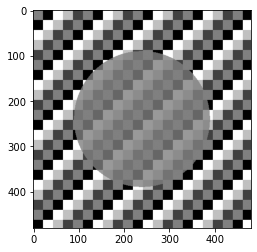

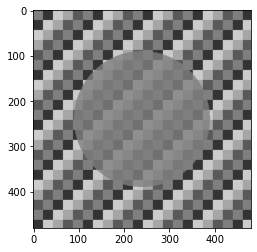

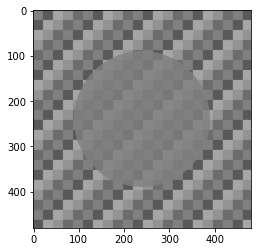

In [39]:
bg_luminance_values = [0.000001, 0.25, 0.5, 0.75, 1.0], [0.2, 0.35, 0.5, 0.65, 0.8], [0.35, 0.425, 0.5, 0.575, 0.65] #[0.05, 0.275, 0.5, 0.725, 0.95] , [0.1, 0.3, 0.5, 0.7, 0.9], [0.15, 0.325, 0.5, 0.675, 0.85], [0.2, 0.35, 0.5, 0.65, 0.8], [0.25, 0.375, 0.5, 0.625, 0.75], \[0.3, 0.4, 0.5, 0.6, 0.7], [0.35, 0.425, 0.5, 0.575, 0.65], [0.4, 0.45, 0.5, 0.55, 0.6], [0.45,0.475,0.5,0.525,0.55]
tau_value = 0.5   # 0.0, 0.2, 0.5, 1.0
alpha_value = 0.2  # 0.1, 0.2, 0.5



bg_luminance_values = shuffle(bg_luminance_values[0], bg_luminance_values[1], bg_luminance_values[2])
images = []

for luminance in bg_luminance_values:


    f = TextureFactory('random',
                       block_width=block_width, 
                       image_width=image_width,
                       luminance_values=luminance)

    # here we ask the factory to give us different background contrasts with constant alpha and tau values.
    im = f.get_image(tau_value, alpha_value, bg_luminance=None)
    # print("bg_luminances:",luminance, "tau:",tau_value, "alpha:",alpha_value)
    plt.figure()
    plt.imshow(im, cmap='gray', vmin=0, vmax=1)
    # print('array size', im.shape)

    # we need to convert array to PIL and use PIL library to save. MATPLOTLIB is not reliable when saving images
    # as it can add unwanted borders
    im = Image.fromarray(im*255).convert('L')
    images.append(im)
    print(luminance)
    #im.save('im_{}.png'.format(luminance))
    


array size (480, 480)


array([0., 1.])

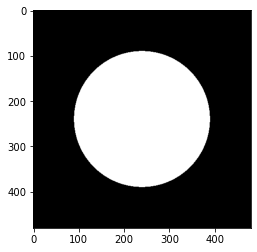

In [29]:
# creating the mask for the inner circle
# getting a checkerboard with a complete white opaque transparecy
f = TextureFactory('checkerboard',block_width=block_width, image_width=image_width,luminance_values= [0, 0, 0, 1, 1])
mask = f.get_image(1, 0, bg_luminance=0.0)

print('array size', mask.shape)
plt.figure()
plt.imshow(mask, cmap='gray', vmin=0, vmax=1)

# saving in case we need it in another notebook 
mask_im = Image.fromarray(mask*255).convert('L')
mask_im.save('mask.png')

np.unique(mask) # should be only 0 and 1 as the mask is binary

[[191 191 191 ... 255 255 255]
 [191 191 191 ... 255 255 255]
 [191 191 191 ... 255 255 255]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]
[[146 146 146 ... 165 165 165]
 [146 146 146 ... 165 165 165]
 [146 146 146 ... 165 165 165]
 ...
 [165 165 165 ...  89  89  89]
 [165 165 165 ...  89  89  89]
 [165 165 165 ...  89  89  89]]


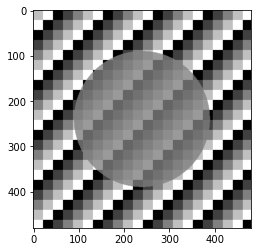

In [30]:
# open an image with a transparency
# im = Image.open('im_[1e-06, 0.5, 0.25, 1.0, 0.75].png').convert('L')

#for luminance in bg_luminance_values:
#im = Image.open(f"im_{bg_luminance_values[0]}.png")
#im1= Image.open(f"im_{bg_luminance_values[2]}.png")
im = images[0]
im1 = images[2]

# convert to numpy array
im = np.array(im)
im1 = np.array(im1)
print(im)
print(im1)
plt.imshow(im, cmap='gray')

plt.imshow(im1, cmap='gray')

In [31]:
# now we apply the mask to the numpy array
center = im[mask==1.0]

# center vector has only the values in the transparent region. We now
# get the unique values in it
transp_values = np.unique(center)/255
print('values inside transparent medium:', transp_values.round(2))

# and we do the same for the surround - region without transparency
surr = im[mask==0.0]

surr_values = np.unique(surr)/255
print('values in the background:', surr_values.round(2))

values inside transparent medium: [0.4  0.45 0.5  0.55 0.6 ]
values in the background: [0.   0.25 0.5  0.75 1.  ]


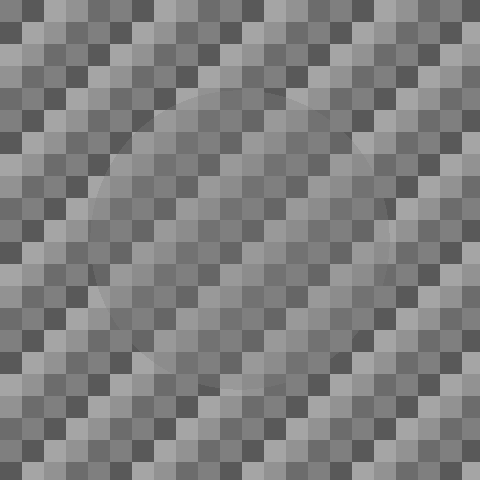

In [40]:
# The transparent media with alpha and tau values on the background with highest contrast
# is cut out and pasted on variegated checkerboards with different background contrasts.

# for luminance in bg_luminance_values:
# print(bg_luminance_values[0])
# print(bg_luminance_values[2])

#tm = Image.open(f"im_{bg_luminance_values[2]}.png") # image that the transparent medium is taken
#bg = Image.open(f"im_{bg_luminance_values[0]}.png") # image that the tm is pasted on

tm = images[0] # from where you take the middle part
bg = images[2] # where to put it

# print(np.asarray(im2))
##im5 = Image.composite(tm, bg, mask_im)
#plt.imshow(im5, cmap='gray')

back_im = bg.copy() 
back_im.paste(tm, (0, 0), mask_im) # replaced 
back_im
#plt.imshow(np.array(back_im), cmap='gray',vmin = 0, vmax = 1.0)
#back_im.save('masked.jpg', quality=95)
        
# print(np.asarray(im))
# print(np.asarray(mask))
# print(np.asarray(mask_invert))
# plt.imshow(back_im, cmap='gray')

In [27]:
# now we can use these values to calculate a contrast metric, for example
# the Space-averaged logarithm of Michelson contrast as in the paper Aguilar & Maertens (2022)

# Michelson contrast
def michelson_contrast(a, b):
    return abs(a-b)/(a+b)


# we iterate through all pairs of values in transparency
n = len(transp_values)

contrast_transp = []

# contrast between all possible non-identical pairs
for i in range(n):
    for j in range(i+1, n):
        c = michelson_contrast(transp_values [i], transp_values[j])
        contrast_transp.append(c)
    
contrast_transp  = np.array(contrast_transp)
print(contrast_transp.round(2))   

# we now calculate the log and sum

samlg_trasp = np.mean(np.log(contrast_transp))
print('SAMLG in transparency region: ', samlg_trasp.round(3))

[0.06 0.11 0.16 0.2  0.05 0.1  0.15 0.05 0.09 0.04]
SAMLG in transparency region:  -2.42
